In [1]:
%matplotlib inline
from urllib import request 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 

In [31]:
#request.urlretrieve ("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

In [32]:
births['decade'] = 10 * (births['year'] // 10)
births.head() 

year  month  day gender  births  decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960

In [33]:
fig = plt.figure(figsize=(11,8)) 
fig = sns.boxplot(births.births)

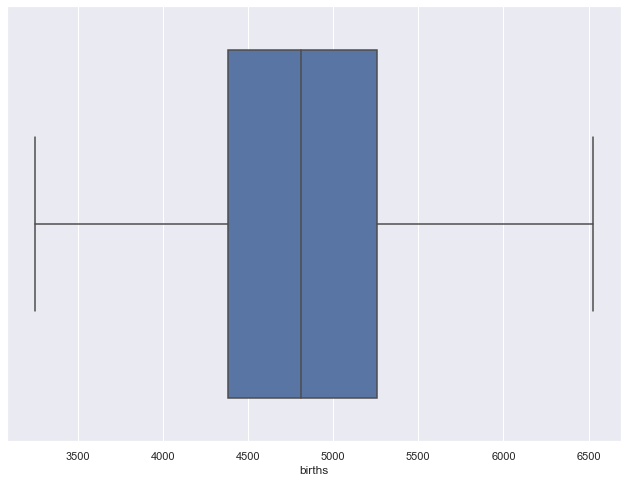

In [34]:
births = births.query('(births > 1000) & (births < 100000)') 
fig = plt.figure(figsize=(11,8)) 
fig = sns.boxplot(births.births)

In [35]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 741.9+ KB


In [36]:
 for i in ["day", "month", "year"]: 
        births[i] = births[i].astype(int)

In [39]:
# create a datetime index from the year, month, day 
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek 
births.head() 

year  month  day gender  births  decade  dayofweek
1969-01-01  1969      1    1      F    4046    1960          2
1969-01-01  1969      1    1      M    4440    1960          2
1969-01-02  1969      1    2      F    4454    1960          3
1969-01-02  1969      1    2      M    4548    1960          3
1969-01-03  1969      1    3      F    4548    1960          4

In [41]:
fig = plt.figure(figsize=(11,8)) 
births_per_day = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='sum') 
births_per_day.plot(figsize=(11,8)) 
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) 
plt.ylabel('Births per day'); 

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

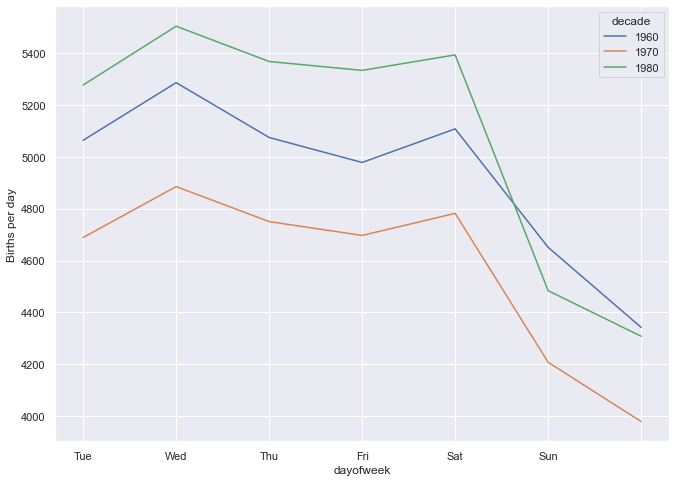

In [42]:
fig = plt.figure(figsize=(11,8)) 
births_per_day = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean') 
births_per_day.plot(figsize=(11,8)) 
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) 
plt.ylabel('Births per day');
